Linear Regression Problem

In [222]:
from fastai.vision import *
from fastai import *
from fastai.basics import *
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
%matplotlib inline

In [223]:
n= 100

In [224]:
x = torch.ones(n,2)
x[:,0].uniform_(-1,1)
x[0:5]

tensor([[-0.5689,  1.0000],
        [-0.3950,  1.0000],
        [-0.4429,  1.0000],
        [ 0.8992,  1.0000],
        [-0.5906,  1.0000]])

In [225]:
a = tensor(3.,2.)
a

tensor([3., 2.])

In [226]:
y = x@a +torch.rand(n) #doing matrix multipication and adding some random noise

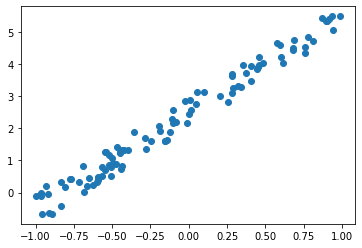

In [227]:
plt.scatter(x[:,0],y)

You want to find co-eficients/parameters(weights) "a" such that you minimize the error between points and line x@a. Note that here "a" is unknown.For regression problem most commonly used error function is **Mean Squared Error.**  

In [228]:
def mse(y_hat,y):
  return ((y_hat - y)**2).mean()

Suppose we believe that a = (-1.0,1.0) then we can compute y_hat which is our prediction and compute the error

In [229]:
a = tensor(-1.,1)
a

tensor([-1.,  1.])

In [230]:
#fitting the simple model and getting prediction
y_hat = x@a
mse(y_hat,y)

tensor(6.5306)

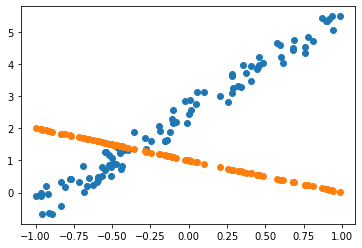

In [231]:
#plotting our predicted result 
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat) 

We would like to find values of a that minimize loss for us and here comes the Important Algorithm : **Gradient Descent** which will iteratively move towards our global loss.Thus is done by taking steps in the negative direction of the function gradient.

In [232]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [233]:
def update():
  y_hat = x@a
  loss = mse(y,y_hat)
  if t % 10 == 0: print(loss)
  loss.backward()       #to calculate gradient
  with torch.no_grad(): 
    a.sub_(lr * a.grad) #update those coefficients a in place with gradient descent algorithm
    a.grad.zero_()
    

In [234]:
lr = 1e-1
for t in range(100):
  update() 

tensor(6.5306, grad_fn=<MeanBackward0>)
tensor(1.5953, grad_fn=<MeanBackward0>)
tensor(0.4807, grad_fn=<MeanBackward0>)
tensor(0.1843, grad_fn=<MeanBackward0>)
tensor(0.1049, grad_fn=<MeanBackward0>)
tensor(0.0836, grad_fn=<MeanBackward0>)
tensor(0.0779, grad_fn=<MeanBackward0>)
tensor(0.0764, grad_fn=<MeanBackward0>)
tensor(0.0760, grad_fn=<MeanBackward0>)
tensor(0.0759, grad_fn=<MeanBackward0>)


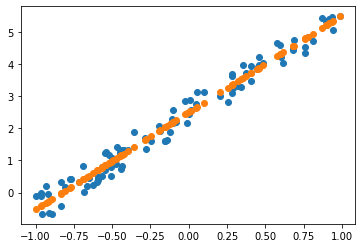

In [235]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());